In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import datetime

import glob
import os

import yfinance as yf

from datetime import timezone, datetime

import requests

pd.set_option('mode.chained_assignment', None)

In [2]:
COMPANY_NAME = 'CDPROJEKT'

In [3]:
def getTicker(company_name):
    yfinance = "https://query2.finance.yahoo.com/v1/finance/search"
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
    params = {"q": company_name, "quotes_count": 1, "country": "Poland"}

    res = requests.get(url=yfinance, params=params, headers={'User-Agent': user_agent})
    data = res.json()

    company_code = data['quotes'][0]['symbol']
    return company_code

In [4]:
DATA_PATH = "data/data_out/"

In [5]:
df = pd.DataFrame()
for file_path in glob.glob(os.path.join(DATA_PATH, '*.csv')):
    df = pd.concat([df, pd.read_csv(file_path)], ignore_index=True)

df=df.drop(columns='Unnamed: 0')
df

,Date,SANTANDER,UNICREDIT,CEZ,PKNORLEN,PKOBP,DINOPL,PZU,ALLEGRO,SANPL,...,WIRTUALNA,GRUPRACUJ,NEUCA,STSHLDING,PLAYWAY,DOMDEV,ASSECOSEE,CIECH,BENEFIT,PCCROKITA
0,2013-04-15,NaN,inf,inf,inf,inf,NaN,inf,NaN,NaN,...,NaN,NaN,inf,NaN,NaN,inf,inf,inf,inf,NaN
1,2013-04-17,NaN,0.085608,0.018996,0.015920,0.011696,NaN,0.003612,NaN,NaN,...,NaN,NaN,0.021398,NaN,NaN,0.014162,0.053191,0.034976,0.024833,NaN
2,2013-04-18,NaN,0.063158,0.011111,0.014504,0.004969,NaN,0.009962,NaN,NaN,...,NaN,NaN,0.021661,NaN,NaN,0.015748,0.043165,0.020666,0.022901,NaN
3,2013-04-19,NaN,0.119250,0.014132,-2.000000,0.000300,NaN,-2.000000,NaN,NaN,...,NaN,NaN,0.018416,NaN,NaN,0.015436,0.028006,0.029714,0.047801,NaN
4,2013-04-22,NaN,0.097166,0.014132,0.024666,0.014521,NaN,0.009852,NaN,NaN,...,NaN,NaN,0.048604,NaN,NaN,0.015748,inf,0.011534,0.053232,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2017-07-19,0.074462,0.054772,0.010828,0.008518,0.010141,0.037574,0.003165,NaN,NaN,...,0.032598,NaN,0.014162,NaN,0.039333,0.013245,0.027239,0.005119,0.017024,0.008433
1063,2017-07-20,0.100244,0.054204,0.013163,0.006767,0.001668,0.038164,0.004913,NaN,NaN,...,0.027738,NaN,0.010297,NaN,0.016529,0.012978,0.006536,0.014342,0.018657,0.000538
1064,2017-07-21,0.105263,0.066920,0.008342,0.004094,0.003351,0.036944,0.004397,NaN,NaN,...,0.036405,NaN,0.030616,NaN,0.002950,0.038692,0.016529,0.016481,0.024952,0.004077
1065,2017-07-24,0.069965,0.106744,0.028294,0.002351,0.003907,0.048857,0.001984,NaN,NaN,...,0.045084,NaN,0.019611,NaN,0.046816,0.044016,0.083121,0.008957,0.021853,0.010056


In [6]:
df.columns

Index(['Date', 'SANTANDER', 'UNICREDIT', 'CEZ', 'PKNORLEN', 'PKOBP', 'DINOPL',
       'PZU', 'ALLEGRO', 'SANPL', 'KGHM', 'MOL', 'PEKAO', 'PEPCO', 'INGBSK',
       'LPP', 'PGE', 'KRKA', 'MBANK', 'CDPROJEKT', 'CYFRPLSAT', 'HANDLOWY',
       'ORANGEPL', 'BNPPL', 'IIAAV', 'BUDIMEX', 'JSW', 'KRUK', 'MILLENNIUM',
       'INTERCARS', 'ASSECOPOL', 'PEP', 'ALIOR', 'KETY', 'GRPAAZOTY', 'AMREST',
       'XTB', 'TAURONPE', 'GTC', 'ENEA', 'LIVECHAT', 'WIRTUALNA', 'GRUPRACUJ',
       'NEUCA', 'STSHLDING', 'PLAYWAY', 'DOMDEV', 'ASSECOSEE', 'CIECH',
       'BENEFIT', 'PCCROKITA'],
      dtype='object')

In [7]:
df = df[['Date', COMPANY_NAME]] 
df

,Date,CDPROJEKT
0,2013-04-15,inf
1,2013-04-17,0.004351
2,2013-04-18,0.007380
3,2013-04-19,0.015038
4,2013-04-22,0.008969
...,...,...
1062,2017-07-19,0.013615
1063,2017-07-20,0.014528
1064,2017-07-21,0.005681
1065,2017-07-24,0.006794


In [8]:
# msft = yf.Ticker("CDR.WA" if COMPANY_NAME == 'CDPROJEKT' else 'PKN.WA' if COMPANY_NAME == 'PKNORLEN' else None)
ticker_name = getTicker(COMPANY_NAME)
print(ticker_name)
yf_company = yf.Ticker(ticker_name)
# get stock info
hist = yf_company.history(period="max")
hist = pd.DataFrame(hist)
hist = hist.reset_index()
hist['Date'] = hist['Date'].apply(lambda x: pd.to_datetime(x, utc=False).replace(tzinfo=None))

df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x, utc=False).replace(tzinfo=None))
XY = df.set_index('Date').join(hist.set_index('Date'))
XY = XY.reset_index()
XY = XY.rename(columns={'Close':'P', 'Volume':'V'})
XY['(H-L)/P'] = XY['High'] - XY['Low'] / XY['P']
df = XY[['Date', COMPANY_NAME, 'P', 'V', '(H-L)/P']]
df

CDR.WA


,Date,CDPROJEKT,P,V,(H-L)/P
0,2013-04-15,inf,6.441047,31497,5.534026
1,2013-04-17,0.004351,6.319341,114927,5.449936
2,2013-04-18,0.007380,6.235083,160769,5.367389
3,2013-04-19,0.015038,6.235083,74575,5.277035
4,2013-04-22,0.008969,6.225722,33558,5.319342
...,...,...,...,...,...
1062,2017-07-19,0.013615,79.028435,71823,78.040454
1063,2017-07-20,0.014528,82.153488,225986,81.191527
1064,2017-07-21,0.005681,82.637917,135020,82.593640
1065,2017-07-24,0.006794,82.637917,75549,81.832713


In [9]:
def del_negative(x):
    if x == np.inf: return np.nan
    return x if x > 0 else np.nan

df[COMPANY_NAME] = df[COMPANY_NAME].apply(del_negative)
df['P'] = df['P'].apply(del_negative)
df['V'] = df['V'].apply(del_negative)
df['(H-L)/P'] = df['(H-L)/P'].apply(del_negative)
# df['CDPROJEKT'] = df['CDPROJEKT'].apply(del_negative)
# df['PKOBP'] = df['PKOBP'].apply(del_negative)

<Axes: >

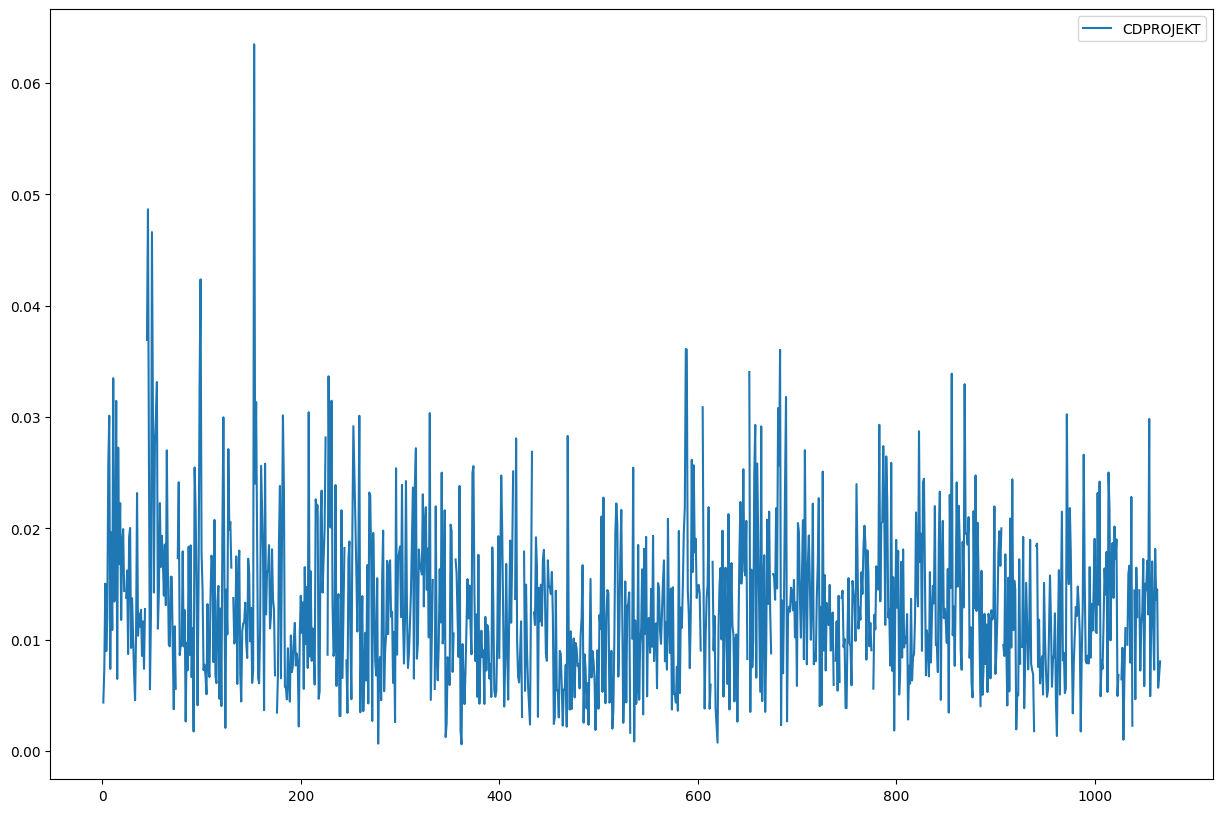

In [10]:
df.plot(use_index=True, y=COMPANY_NAME, figsize=(15,10))

In [11]:
df.isna().sum()


Date          0
CDPROJEKT    29
P             0
V             1
(H-L)/P       0
dtype: int64

In [12]:
df = df.dropna().reset_index(drop=True) #AD_HOCK -> TODO !
df

,Date,CDPROJEKT,P,V,(H-L)/P
0,2013-04-17,0.004351,6.319341,114927.0,5.449936
1,2013-04-18,0.007380,6.235083,160769.0,5.367389
2,2013-04-19,0.015038,6.235083,74575.0,5.277035
3,2013-04-22,0.008969,6.225722,33558.0,5.319342
4,2013-04-23,0.011958,6.141463,78896.0,5.272531
...,...,...,...,...,...
1032,2017-07-19,0.013615,79.028435,71823.0,78.040454
1033,2017-07-20,0.014528,82.153488,225986.0,81.191527
1034,2017-07-21,0.005681,82.637917,135020.0,82.593640
1035,2017-07-24,0.006794,82.637917,75549.0,81.832713


In [13]:
list(df[COMPANY_NAME].values)

[0.0043509789702683,
 0.0073800738007379,
 0.0150375939849624,
 0.0089686098654707,
 0.0119581464872944,
 0.0255831452219715,
 0.0301204819277108,
 0.0073691967575534,
 0.0196353436185134,
 0.0108695652173913,
 0.0334896182183523,
 0.0134228187919462,
 0.0136986301369862,
 0.0314547837483617,
 0.006472491909385,
 0.0272550292018169,
 0.0167850225952227,
 0.0222658808120497,
 0.0117724002616089,
 0.0187165775401069,
 0.0199335548172756,
 0.0143696930111038,
 0.0137585991244528,
 0.01621958827199,
 0.0087118855009334,
 0.0192076830732293,
 0.0200353565114908,
 0.0092592592592592,
 0.0137299771167049,
 0.0102915951972555,
 0.0069204152249133,
 0.0045610034207524,
 0.0104106419895893,
 0.0231749710312863,
 0.0103507763082231,
 0.012352610892757,
 0.0111731843575418,
 0.0126849894291753,
 0.0085470085470085,
 0.0116463737427209,
 0.007380073800738,
 0.0127523910733263,
 0.0369267421083979,
 0.048667439165701,
 0.0255516840882695,
 0.0055401662049862,
 0.0121212121212122,
 0.0466148723640399

In [14]:
# df['CDPROJEKT_ln_diff'] = np.log(df['CDPROJEKT'].shift(-1)) - np.log(df['CDPROJEKT'])
df[COMPANY_NAME+'_ln_diff'] = np.log(df[COMPANY_NAME].shift(-1)) - np.log(df[COMPANY_NAME])
df['P'+'_ln_diff'] = np.log(df['P'].shift(-1)) - np.log(df['P'])
df['V'+'_ln_diff'] = np.log(df['V'].shift(-1)) - np.log(df['V'])
df['(H-L)/P'+'_ln_diff'] = np.log(df['(H-L)/P'].shift(-1)) - np.log(df['(H-L)/P'])
# df['PKOBP_ln_diff'] = np.log(df['PKOBP'].shift(-1)) - np.log(df['PKOBP'])
df


,Date,CDPROJEKT,P,V,(H-L)/P,CDPROJEKT_ln_diff,P_ln_diff,V_ln_diff,(H-L)/P_ln_diff
0,2013-04-17,0.004351,6.319341,114927.0,5.449936,0.528383,-0.013423,0.335671,-0.015262
1,2013-04-18,0.007380,6.235083,160769.0,5.367389,0.711770,0.000000,-0.768163,-0.016977
2,2013-04-19,0.015038,6.235083,74575.0,5.277035,-0.516823,-0.001502,-0.798530,0.007985
3,2013-04-22,0.008969,6.225722,33558.0,5.319342,0.287682,-0.013626,0.854855,-0.008839
4,2013-04-23,0.011958,6.141463,78896.0,5.272531,0.760521,0.024098,0.193046,0.009434
...,...,...,...,...,...,...,...,...,...
1032,2017-07-19,0.013615,79.028435,71823.0,78.040454,0.064868,0.038782,1.146268,0.039584
1033,2017-07-20,0.014528,82.153488,225986.0,81.191527,-0.938854,0.005879,-0.515050,0.017122
1034,2017-07-21,0.005681,82.637917,135020.0,82.593640,0.178784,0.000000,-0.580641,-0.009256
1035,2017-07-24,0.006794,82.637917,75549.0,81.832713,0.170325,0.002296,0.503988,0.011918


In [15]:
print(df.isna().sum())
df = df.dropna().reset_index(drop=True) #AD_HOCK -> TODO !
df

Date                 0
CDPROJEKT            0
P                    0
V                    0
(H-L)/P              0
CDPROJEKT_ln_diff    1
P_ln_diff            1
V_ln_diff            1
(H-L)/P_ln_diff      1
dtype: int64


,Date,CDPROJEKT,P,V,(H-L)/P,CDPROJEKT_ln_diff,P_ln_diff,V_ln_diff,(H-L)/P_ln_diff
0,2013-04-17,0.004351,6.319341,114927.0,5.449936,0.528383,-0.013423,0.335671,-0.015262
1,2013-04-18,0.007380,6.235083,160769.0,5.367389,0.711770,0.000000,-0.768163,-0.016977
2,2013-04-19,0.015038,6.235083,74575.0,5.277035,-0.516823,-0.001502,-0.798530,0.007985
3,2013-04-22,0.008969,6.225722,33558.0,5.319342,0.287682,-0.013626,0.854855,-0.008839
4,2013-04-23,0.011958,6.141463,78896.0,5.272531,0.760521,0.024098,0.193046,0.009434
...,...,...,...,...,...,...,...,...,...
1031,2017-07-18,0.018154,78.363541,104374.0,77.465873,-0.287699,0.008449,-0.373776,0.007390
1032,2017-07-19,0.013615,79.028435,71823.0,78.040454,0.064868,0.038782,1.146268,0.039584
1033,2017-07-20,0.014528,82.153488,225986.0,81.191527,-0.938854,0.005879,-0.515050,0.017122
1034,2017-07-21,0.005681,82.637917,135020.0,82.593640,0.178784,0.000000,-0.580641,-0.009256


<Axes: >

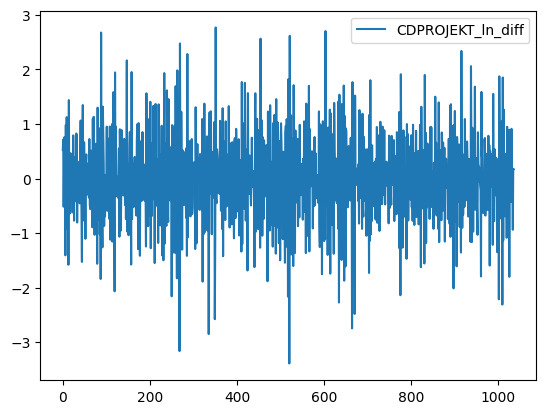

In [16]:
df.plot(use_index=True, y=COMPANY_NAME+'_ln_diff') #, figsize=(15,10)

In [17]:
variables_names = [COMPANY_NAME+'_ln_diff',	'P_ln_diff',	'V_ln_diff',	'(H-L)/P_ln_diff']

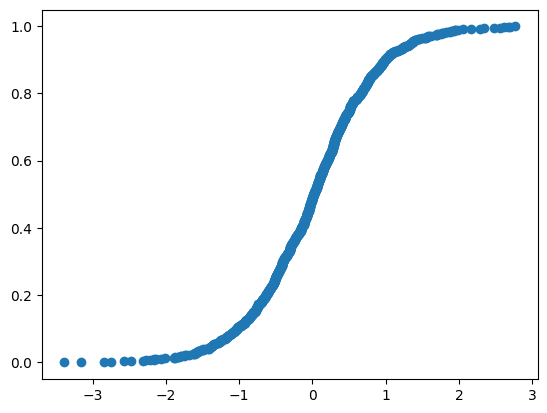

In [18]:
syt_tab = [df[[col_name]].sort_values(col_name).reset_index(drop=True) for col_name in variables_names]
plt.scatter(x=syt_tab[0].iloc[:, 0].values, y=np.array((syt_tab[0].index-0.5)/len(syt_tab[0].index)))
plt.show()

In [19]:
mu_tab = [df[col_name].median() for col_name in variables_names]
b_tab = [(np.abs(df[col_name] - mu_tab[it])).mean() for it, col_name in enumerate(variables_names)]
for v,m,b in zip(variables_names,mu_tab,b_tab):
    print(v,'- mu=',m,'b=',b)

CDPROJEKT_ln_diff - mu= 0.019469764869017858 b= 0.6343759443212382
P_ln_diff - mu= 0.00012621740301943518 b= 0.015266291435587758
V_ln_diff - mu= -0.0309622707592645 b= 0.6397776329914359
(H-L)/P_ln_diff - mu= -0.0003232194412101652 b= 0.014704893916143142


In [20]:
def cdf_L(y,mu,b):
    return np.exp((y-mu)/b)/2 if y<mu else 1-np.exp(-(y-mu)/b)/2

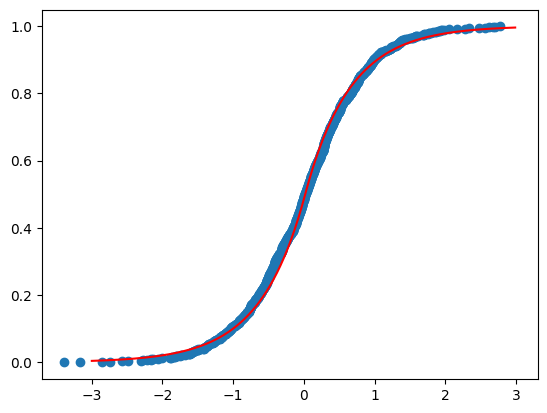

In [21]:
y_val = [cdf_L(x,mu_tab[0],b_tab[0]) for x in np.arange(-3,3, 0.01)]
x_val = [x for x in np.arange(-3,3, 0.01)]
plt.plot(x_val,y_val, 'r')
plt.scatter(x=syt_tab[0].iloc[:, 0].values, y=np.array((syt_tab[0].index-0.5)/len(syt_tab[0].index)))

In [22]:
xt = [df[v].apply(cdf_L,args=(mu_tab[i],b_tab[i])) for i,v in enumerate(variables_names)]

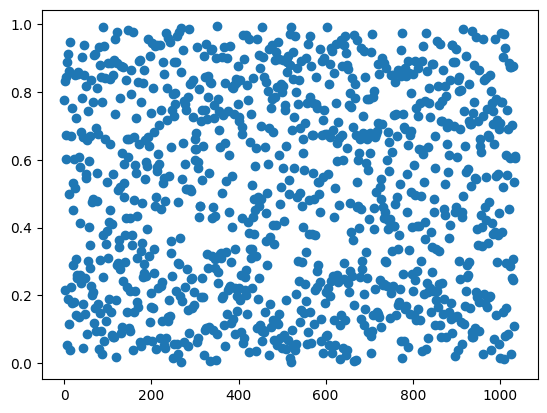

In [23]:
plt.scatter(xt[0].index,xt[0])

<Axes: >

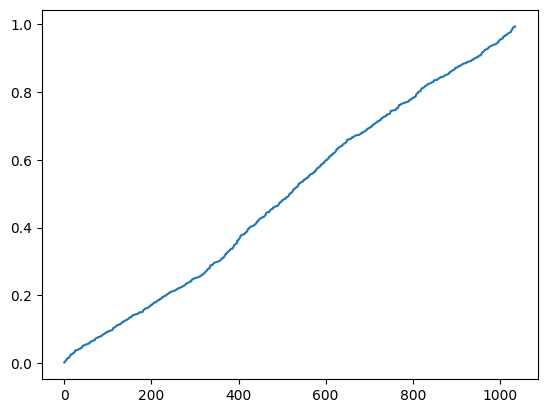

In [24]:
xt[0].sort_values().reset_index(drop=True).plot()

In [25]:
l_poln = [
    lambda x: 1,
    lambda x: np.sqrt(3)*(-1 + 2*x),
    lambda x: np.sqrt(5)*(1 - 6*x + 6*x**2),
    lambda x: np.sqrt(7)*(-1 + 12*x - 30*x**2 + 20*x**3),
    lambda x: 3 *(1-20*x+90*x**2-140*x**3+70*x**4),
]

In [26]:
cl = 3;
d = 3 
m = len(l_poln)-1 #(* maximal degree of polynomial *)

coefn = np.power(m+1,d)
print(coefn, "coefficients")

125 coefficients


In [27]:
ct = pd.DataFrame(np.transpose([xt[i] for i in range(d+1)]))
ct = ct[d:]
ct.reset_index(drop=True)

,0,1,2,3
0,0.672394,0.203113,0.874784,0.280197
1,0.844530,0.896000,0.647703,0.742478
2,0.601413,0.767784,0.130215,0.927896
3,0.052698,0.985689,0.965823,0.991525
4,0.890005,0.930180,0.468082,0.910257
...,...,...,...,...
1028,0.308093,0.710128,0.292591,0.704081
1029,0.534532,0.960253,0.920596,0.966859
1030,0.110383,0.656990,0.234618,0.847332
1031,0.611042,0.495883,0.211756,0.272371


In [28]:
values_2 = []
for pol_f in l_poln:
    c_tab = []
    for idx, col in ct.iteritems():
        c_tab.append([pol_f(x) for x in col])
    values_2.append(c_tab)

ctp = np.array(values_2)
print(ctp.shape)

(5, 4, 1033)


C:\Users\lukas\AppData\Local\Temp\ipykernel_37940\1397416346.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, col in ct.iteritems():


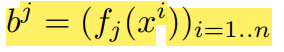

In [29]:
B_j_Y = [[row for row in ctp[fun][0]] for fun in range(len(l_poln))]
B_j_Y = np.array(B_j_Y)
print(B_j_Y)

[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 0.59719109  1.19348828  0.35130514 ... -1.34967429  0.38465959
   0.36657132]
 [-0.71930148  0.47450958 -0.98005149 ...  0.91859987 -0.95260633
  -0.96779869]
 [-1.09722571 -0.57060344 -0.74975116 ... -0.03714547 -0.8089161
  -0.77721824]
 [-0.02690394 -1.25765933  0.68440499 ... -0.86688725  0.60206611
   0.64742791]]


In [30]:
# jt_tab = [[int(x)+0 for x in np.base_repr(i, base=m+1).zfill(d)] for i in range(coefn)] # for not X_Y
jt_tab = [[int(x) for x in np.base_repr(i, base=m+1).zfill(d)] for i in range(coefn)]

print(jt_tab)
len(jt_tab)

[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 1, 0], [0, 1, 1], [0, 1, 2], [0, 1, 3], [0, 1, 4], [0, 2, 0], [0, 2, 1], [0, 2, 2], [0, 2, 3], [0, 2, 4], [0, 3, 0], [0, 3, 1], [0, 3, 2], [0, 3, 3], [0, 3, 4], [0, 4, 0], [0, 4, 1], [0, 4, 2], [0, 4, 3], [0, 4, 4], [1, 0, 0], [1, 0, 1], [1, 0, 2], [1, 0, 3], [1, 0, 4], [1, 1, 0], [1, 1, 1], [1, 1, 2], [1, 1, 3], [1, 1, 4], [1, 2, 0], [1, 2, 1], [1, 2, 2], [1, 2, 3], [1, 2, 4], [1, 3, 0], [1, 3, 1], [1, 3, 2], [1, 3, 3], [1, 3, 4], [1, 4, 0], [1, 4, 1], [1, 4, 2], [1, 4, 3], [1, 4, 4], [2, 0, 0], [2, 0, 1], [2, 0, 2], [2, 0, 3], [2, 0, 4], [2, 1, 0], [2, 1, 1], [2, 1, 2], [2, 1, 3], [2, 1, 4], [2, 2, 0], [2, 2, 1], [2, 2, 2], [2, 2, 3], [2, 2, 4], [2, 3, 0], [2, 3, 1], [2, 3, 2], [2, 3, 3], [2, 3, 4], [2, 4, 0], [2, 4, 1], [2, 4, 2], [2, 4, 3], [2, 4, 4], [3, 0, 0], [3, 0, 1], [3, 0, 2], [3, 0, 3], [3, 0, 4], [3, 1, 0], [3, 1, 1], [3, 1, 2], [3, 1, 3], [3, 1, 4], [3, 2, 0], [3, 2, 1], [3, 2, 2], [3, 2, 3], [3, 2, 4], [3, 3, 0]

125

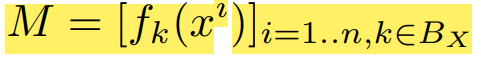

In [48]:
coef = []
for row in range(len(ctp[0][0])):
    ans = []
    for jt in jt_tab:
        ans.append(np.product([ctp[jt[i]][i+1][row] for i in range(len(jt))]))
    coef.append(ans)
print(len(coef))
coef = np.array(coef)

1033


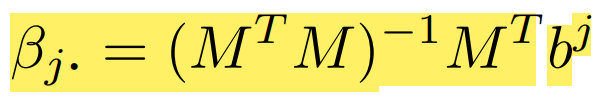

In [49]:
B_j_tab = [np.matmul(np.matmul(np.linalg.inv(np.matmul(coef.T,coef)),coef.T),B_j_Y[y_j]) for y_j in range(len(B_j_Y))]

print(f'({len(B_j_tab)}, {len(B_j_tab[0])})')

(5, 125)


In [33]:
import seaborn as sns

<Axes: >

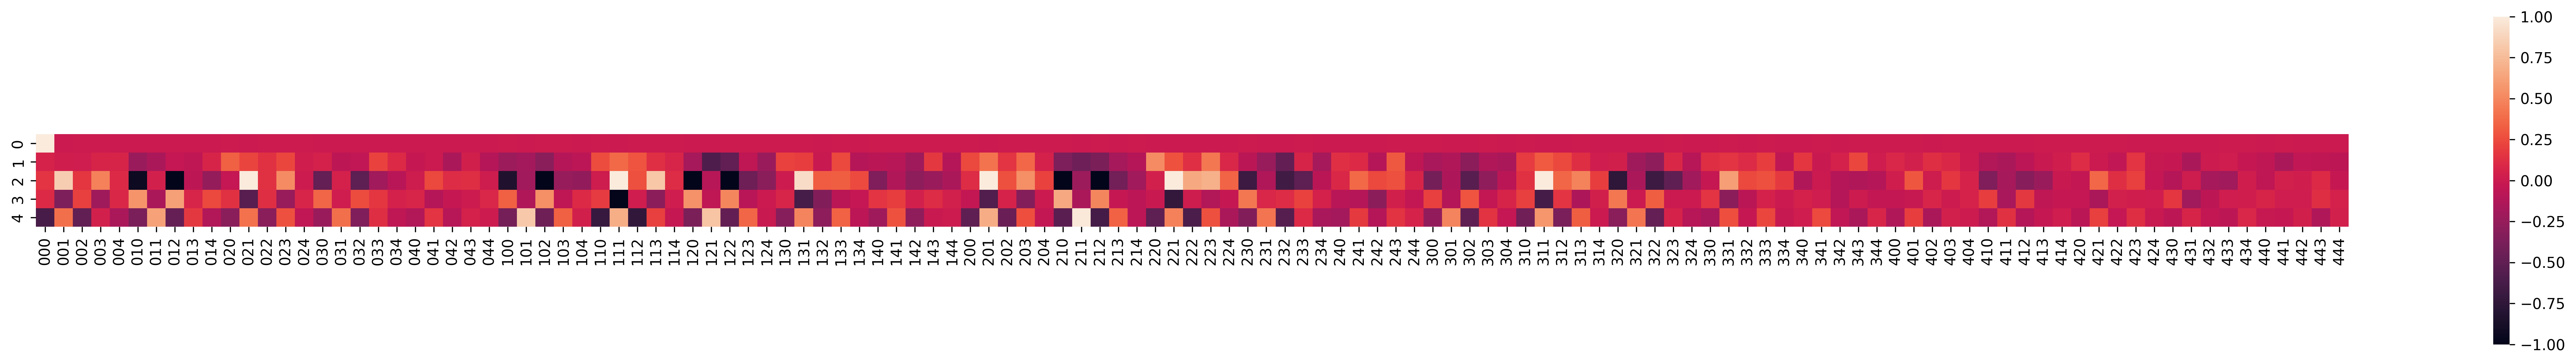

In [34]:
coef_heatmap = pd.DataFrame(B_j_tab, columns=[''.join(list(map(str,el))) for el in jt_tab])
plt.figure(figsize=(35,4), dpi=300)
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(coef_heatmap, vmin=-1, vmax=1, square=True, ) #, square=True

*PZU*
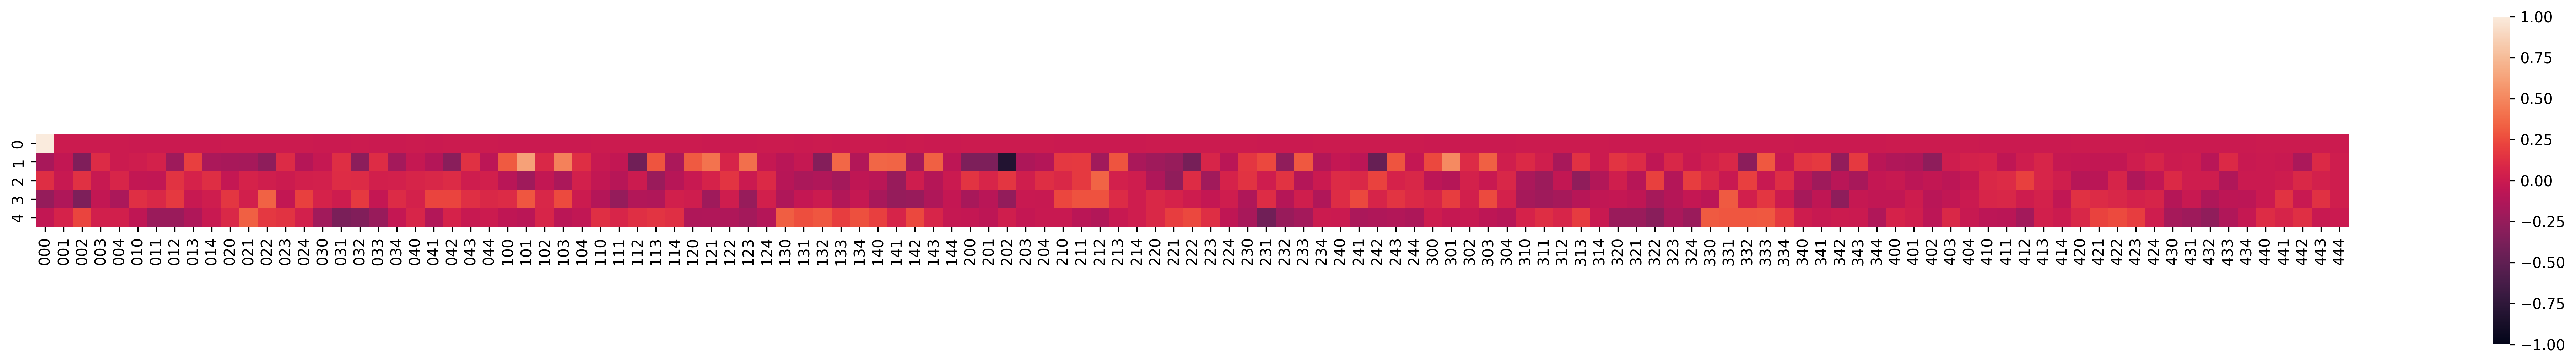

*CD PROJEKT*
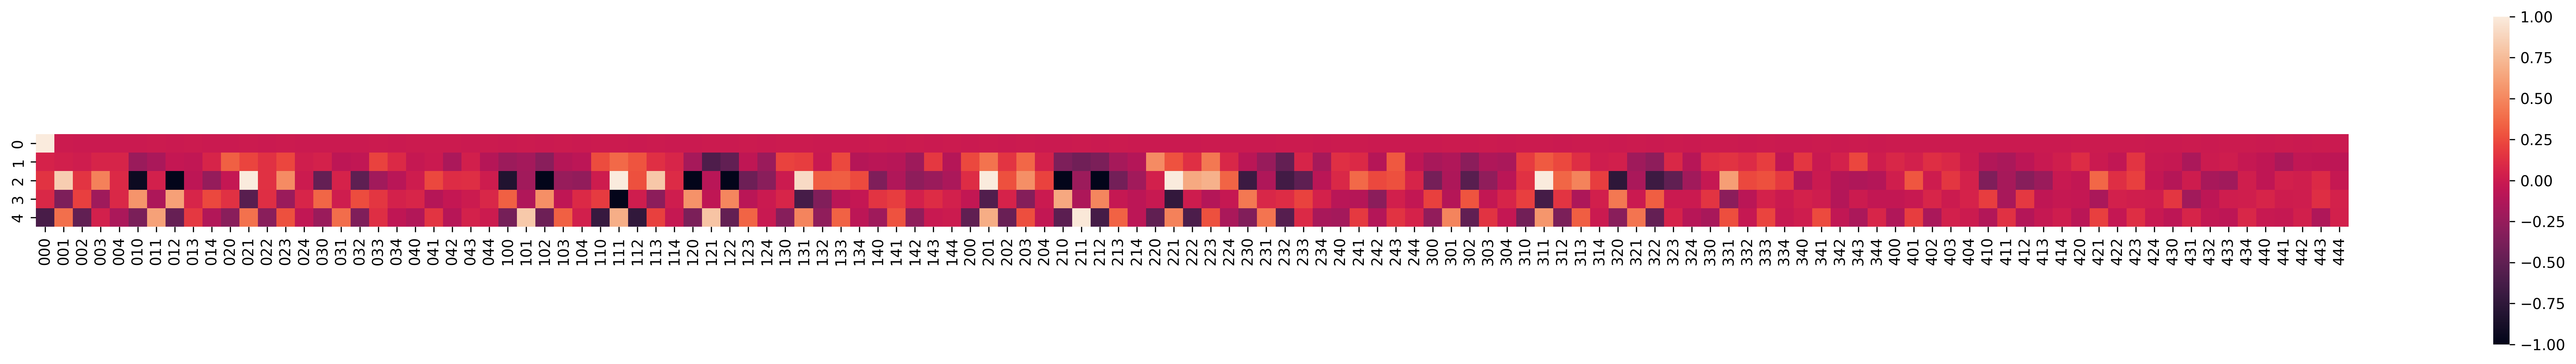

*PKN ORLEN*
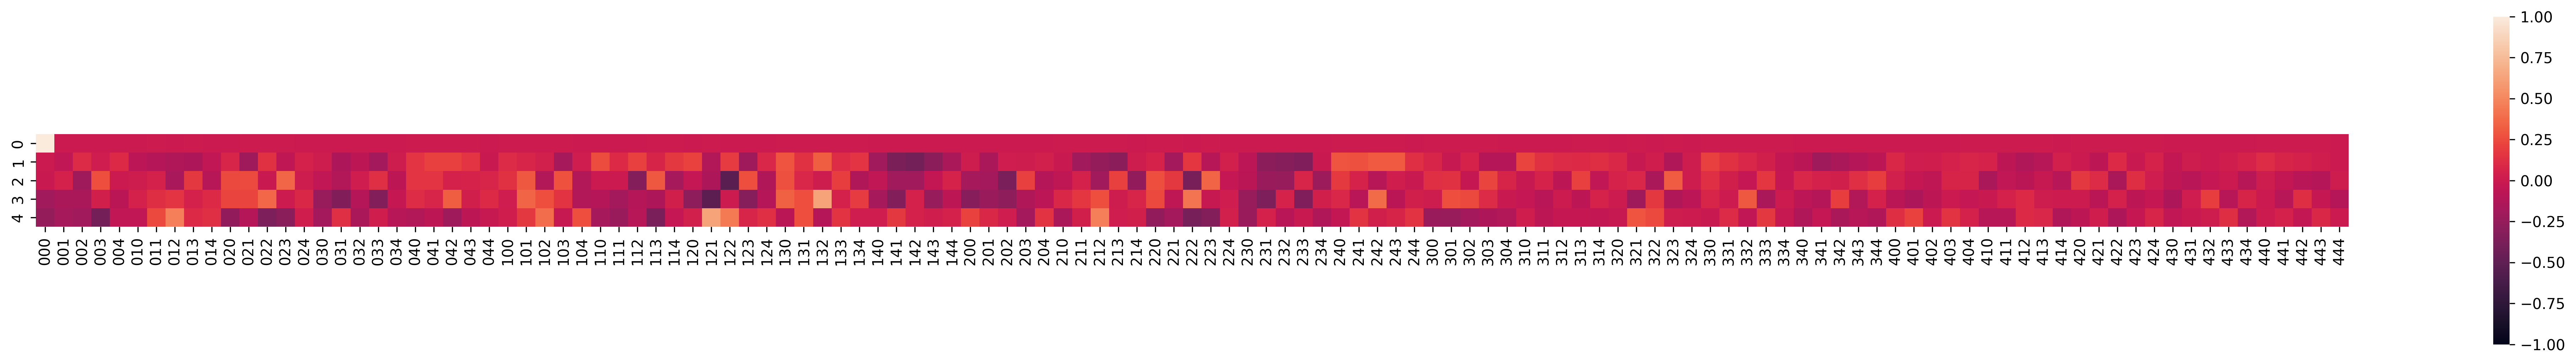

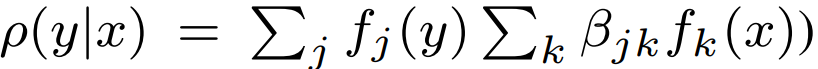

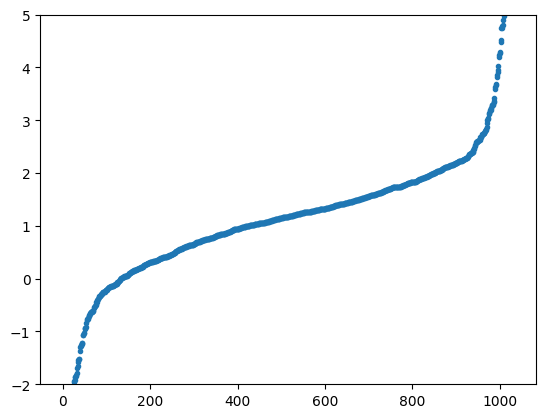

In [35]:
p_yx = []
for i,c in ct.iterrows():
    sum_j = 0
    for j in range(len(l_poln)):
        sum_k = 0
        for k in range(len(l_poln)):
            sum_k += B_j_tab[j][k] * np.product([l_poln[k](c[d]) for d in range(1,4)])
        sum_j += l_poln[j](c[0]) * sum_k
    p_yx.append(sum_j)

p_yx = np.sort(p_yx)
p_yx = pd.DataFrame(p_yx)
plt.ylim(-2,5)
plt.scatter(y=p_yx[0].values ,x=p_yx.index.values, marker=".")
plt.show()

In [36]:
# # for old
pt = np.zeros(shape=(len(l_poln),len(ct)))
for j in range(len(l_poln)):
    for it, jt in enumerate(jt_tab):
        pt[j] += B_j_tab[j][it]*np.product([ctp[jt[c], c+1] for c in range(d)], axis=0)
pt

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-0.49255667, -0.16034381, -0.08656198, ..., -0.13475621,
         0.36365896, -0.23007652],
       [-0.06664728,  0.04396415,  0.84160653, ...,  0.78073204,
         0.30245623, -0.0391203 ],
       [ 0.21238017, -0.27081248, -0.78039474, ...,  0.12792733,
         0.05575537, -0.19100516],
       [ 0.06683753, -0.01058137,  1.31720543, ...,  0.05556984,
        -0.20098564, -0.05597218]])

In [37]:
for i in range(len(l_poln)-1, -1, -1):
    pt[i] /= pt[0]

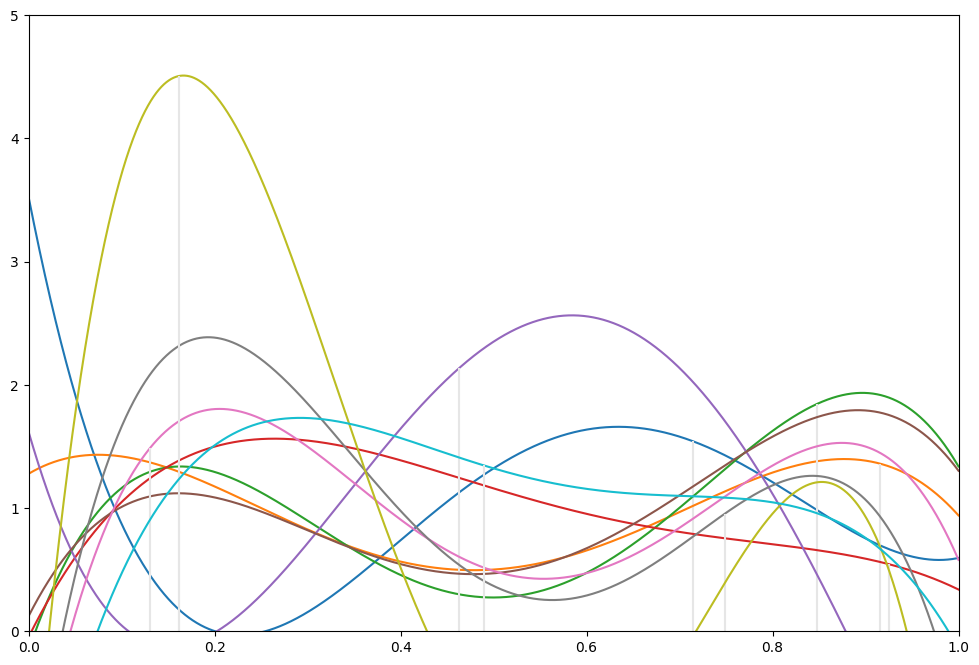

In [38]:
import random as rand

# plst = [rand.randint(1,len(ct)-1) for _ in range(10)]
# plst = [i for i in range(1, len(ct))]
plst = np.array([926, 644, 328, 269, 206, 928, 885, 504, 67, 441])
plt.figure(figsize=(12, 8))
plt.xlim(0,1)
plt.ylim(0,5)
x_range = np.arange(0,1,0.0001)
for i in plst:
    
    y_vals = [np.sum([pt[j][i] * l_poln[j](x) for j in range(len(l_poln))]) for x in np.arange(0,1,0.0001)]
    py_i = np.sum([pt[j][i] * l_poln[j](ct.iloc[i,0]) for j in range(len(l_poln))])
    plt.plot(list(x_range),y_vals, alpha=1)
    plt.stem(ct.iloc[i,0], py_i, '0.9', markerfmt=" ") #p_yx[0].values[i]

    # print(np.trapz(y_vals, x=x_range))

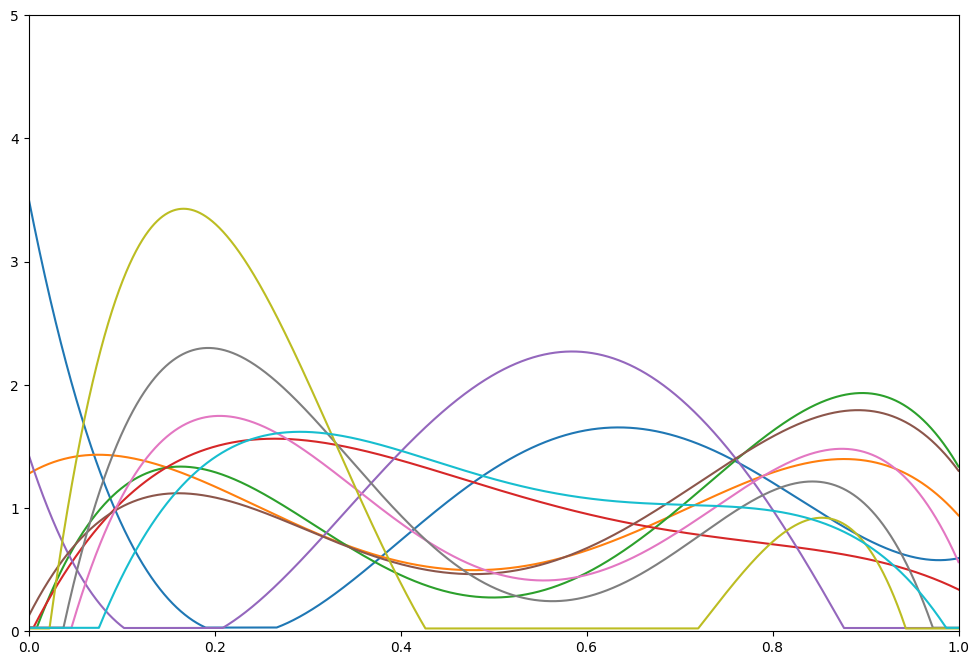

In [39]:
plt.figure(figsize=(12, 8))
plt.xlim(0,1)
plt.ylim(0,5)
treshold = 0.03
x_range = np.arange(0,1,0.0001)
for i in plst:
    y_vals = np.array([np.sum([pt[j][i] * l_poln[j](x) for j in range(len(l_poln))]) for x in x_range])
    y_vals = np.where(y_vals<treshold, 0.03, y_vals) 
    y_vals = y_vals / np.trapz(y_vals, x=x_range) # normalize
    plt.plot(list(x_range),y_vals)
    # print(np.trapz(y_vals, x=x_range))